In [23]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from labg4 import save_outputs

np.random.seed(42)

output_folder = 'outputs/20-11-2023_03-14'
df = pd.read_csv(os.path.join(output_folder, 'results.csv'))
#df.head()

with open(os.path.join(output_folder, 'results.pkl'), 'rb') as file:
    results = pickle.load(file)
    
save_outputs(df, results)

Saving the outputs in outputs/20-11-2023_03-15: 100%|██████████| 7/7 operations [00:06<00:00,  1.05it/s]


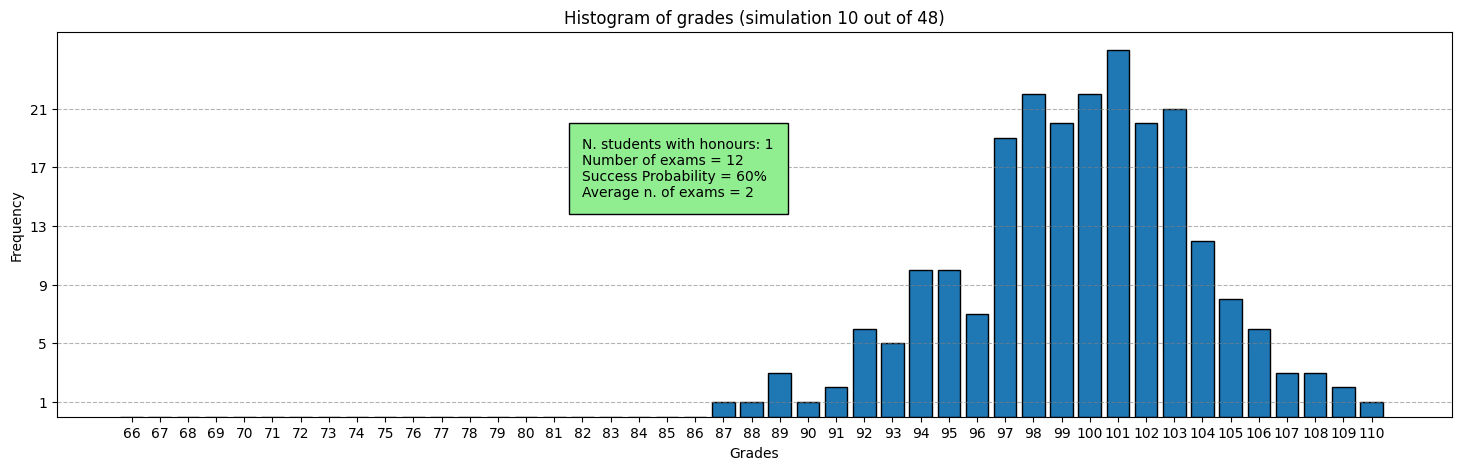

In [16]:
from labg4 import calculate_final_grade

n_simulation = None
honours = False
while not honours:
    for i,simulation in enumerate(results):
        honours = 0
        graduations = []
        for grades,_,_ in simulation:
            grade, honour = calculate_final_grade(grades)
            graduations.append(grade)
            honours += honour
        
        if honours and int(df.loc[i][1] > .4): 
            tot_exams, succ_prob, max_exams, av_exams = df.loc[i][:4]
        
            plt.figure(figsize=(18,5))

            bins = (np.arange(66,112)-.4)
            n, bins, patches = plt.hist(graduations, bins=bins, edgecolor='black', width=0.8)
            plt.title(f'Histogram of grades (simulation {i} out of {len(df)})')
            plt.xlabel('Grades')
            plt.ylabel('Frequency')
            plt.text(82, max(n)-10, f'N. students with honours: {honours}\nNumber of exams = {tot_exams:.0f}\nSuccess Probability = {succ_prob*100:.0f}%\nAverage n. of exams = {av_exams:.0f}', 
                     bbox={'facecolor': 'lightgreen', 'pad': 10}, zorder=2)
            plt.yticks(np.arange(1,max(n),4))
            plt.xticks(np.arange(66,111))
            plt.grid(which='major', axis='y', linestyle='--', color='gray', alpha=0.6)
            plt.show()
            n_simulation = i
            break

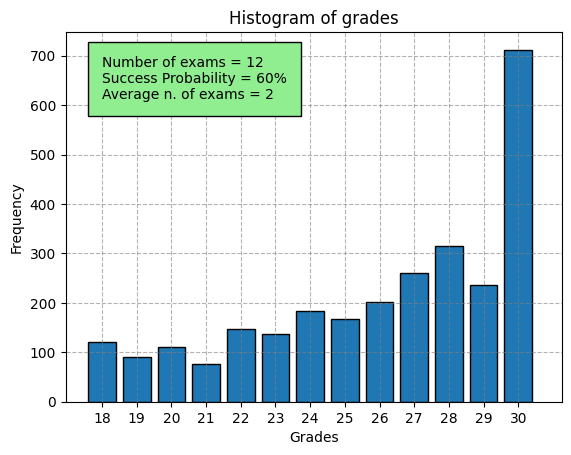

In [17]:
import matplotlib.pyplot as plt

grades = [grade for grades,_,_ in results[n_simulation] for grade in grades ]
tot_exams, succ_prob, max_exams, av_exams = df.loc[n_simulation][:4]
bins = (np.arange(18,32)-.4)
n,_,_ = plt.hist(grades, bins=bins, edgecolor='black', width=0.8)
plt.title(f'Histogram of grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.xticks(np.arange(18,31))
if (max(n) // 50) % 2:
    plt.yticks(np.arange(0,max(n)+100, 100))
else:
    plt.yticks(np.arange(0,max(n), 100))
plt.text(18, max(n)-100, f'Number of exams = {tot_exams:.0f}'+\
                        f'\nSuccess Probability = {succ_prob*100:.0f}%\nAverage n. of exams = {av_exams:.0f}', 
                     bbox={'facecolor': 'lightgreen', 'pad': 10}, zorder=2)
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.show()

[2.0, 1.6666666666666667, 2.8333333333333335, 2.8333333333333335, 2.5, 2.8333333333333335, 1.8333333333333333, 2.1666666666666665, 2.0, 2.8333333333333335, 1.3333333333333333, 2.6666666666666665, 2.0, 2.1666666666666665, 2.8333333333333335, 2.5, 2.6666666666666665, 2.0, 2.5, 2.6666666666666665, 1.6666666666666667, 3.1666666666666665, 2.1666666666666665, 1.8333333333333333, 2.1666666666666665, 2.5, 2.3333333333333335, 2.1666666666666665, 1.5, 2.5, 1.6666666666666667, 3.0, 2.6666666666666665, 3.5, 2.5, 1.5, 1.6666666666666667, 2.5, 2.5, 2.8333333333333335, 1.6666666666666667, 1.5, 3.0, 3.6666666666666665, 3.0, 2.5, 2.3333333333333335, 1.8333333333333333, 2.3333333333333335, 2.6666666666666665, 1.6666666666666667, 3.1666666666666665, 2.6666666666666665, 3.0, 1.8333333333333333, 2.3333333333333335, 3.3333333333333335, 3.1666666666666665, 1.6666666666666667, 2.6666666666666665, 2.5, 2.1666666666666665, 2.5, 2.8333333333333335, 2.8333333333333335, 2.3333333333333335, 2.1666666666666665, 3.33

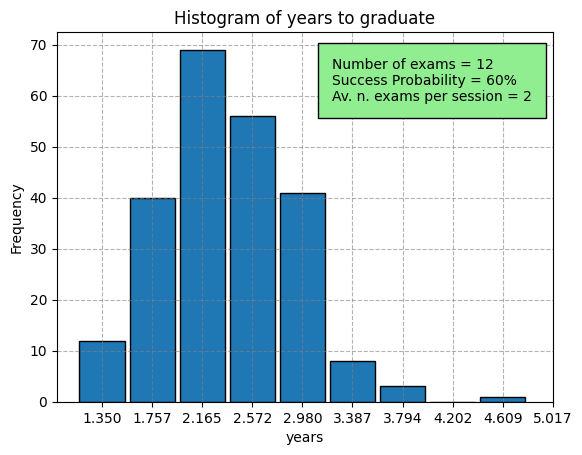

In [18]:
session_per_year = 6
years = [n_session/session_per_year for _,n_session,_ in results[n_simulation]]
print(years)

width = (max(years) - min(years)) / 10
bins = np.linspace(min(years), max(years), num=10)
n,_,_ = plt.hist(years, bins=bins, edgecolor='black', width=width)
plt.title('Histogram of years to graduate')
plt.xlabel('years')
plt.xticks(bins + width / 2)
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.text(max(years) * 2/3, max(n)-10, f'Number of exams = {tot_exams:.0f}'+\
               f'\nSuccess Probability = {succ_prob*100:.0f}%\nAv. n. exams per session = {av_exams:.0f}', 
            bbox={'facecolor': 'lightgreen', 'pad': 10}, zorder=2)
plt.show()

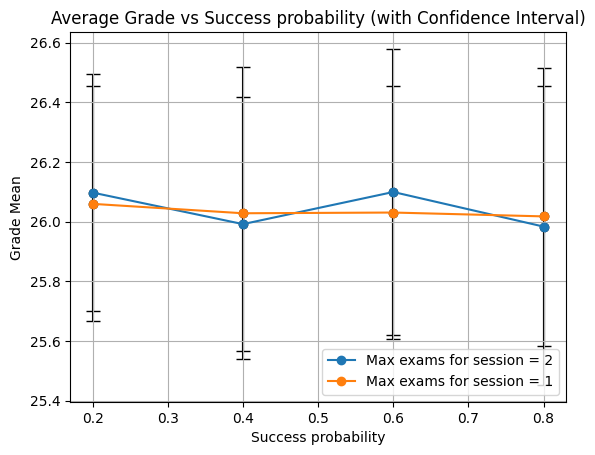

In [19]:
import matplotlib.pyplot as plt

plt.figure()

for av_exams in df['Average exam per session'].unique():

      selected_df = df[(df['Total exams'] == 12) & 
                  (df['Average exam per session'] ==  av_exams) & 
                  (df['Max Exams per session'] == 2) ]
      plt.plot(selected_df['Success probability'], selected_df['Grade Mean'], marker='o', zorder=2, \
            label=f'Max exams for session = {av_exams}')
      plt.errorbar(selected_df['Success probability'], 
                  selected_df['Grade Mean'], 
                  yerr=[selected_df['Grade Mean'] - selected_df['Grade Interval low'], 
                        selected_df['Grade Interval up'] - selected_df['Grade Mean']],
                  fmt='o', capsize=5, c='black', zorder=1)

plt.xlabel('Success probability')
plt.ylabel('Grade Mean')
plt.title('Average Grade vs Success probability (with Confidence Interval)')
plt.grid(True)
plt.legend()
plt.show()
#print(conf_int)
#selected_df

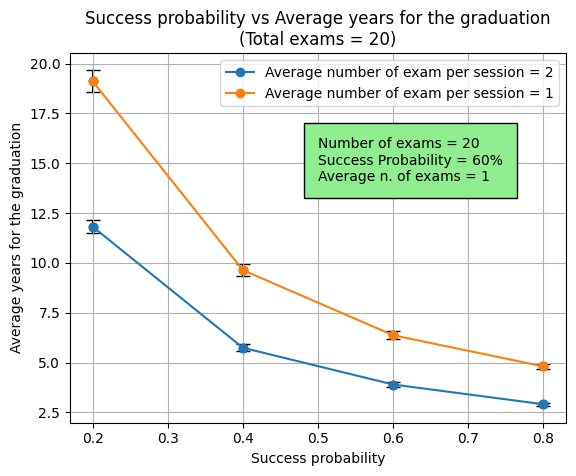

In [20]:
tot_exams = 20
session_per_year = 6
for av_exams in df['Average exam per session'].unique():

      selected_df = df[(df['Total exams'] == tot_exams) & 
                  (df['Average exam per session'] == av_exams) & 
                  (df['Max Exams per session'] == 2) ]
      plt.plot(selected_df['Success probability'], selected_df['Period mean'] / session_per_year, marker='o', zorder=2,
            label=f'Average number of exam per session = {av_exams}')
      plt.errorbar(selected_df['Success probability'], 
                  selected_df['Period mean'] / session_per_year, 
                  yerr=[(selected_df['Period mean'] - selected_df['Period Interval low']) / session_per_year, 
                        (selected_df['Period Interval up'] - selected_df['Period mean']) / session_per_year],
                  fmt='o', capsize=5, c='black', zorder=1)

plt.xlabel('Success probability')
plt.ylabel('Average years for the graduation')
#plt.yticks(np.arange(13))
plt.title(f'Success probability vs Average years for the graduation\n(Total exams = {tot_exams})')
plt.grid(True)
plt.text(.5, max(selected_df['Period mean'] / session_per_year)-5, f'Number of exams = {tot_exams:.0f}'+\
                        f'\nSuccess Probability = {succ_prob*100:.0f}%\nAverage n. of exams = {av_exams:.0f}', 
                     bbox={'facecolor': 'lightgreen', 'pad': 10}, zorder=2)
plt.legend()
plt.show()

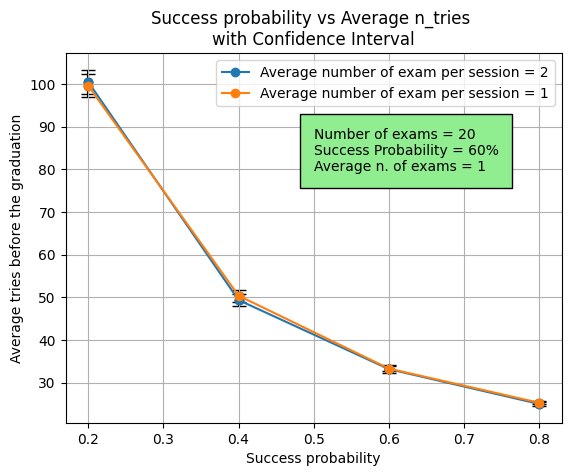

In [21]:
session_per_year = 6
for av_exams in df['Average exam per session'].unique():

      selected_df = df[(df['Total exams'] == int(tot_exams)) & 
                  (df['Average exam per session'] == av_exams) & 
                  (df['Max Exams per session'] == 2) ]
      plt.plot(selected_df['Success probability'], selected_df['Tried Mean'], marker='o', zorder=2,
            label=f'Average number of exam per session = {av_exams}')
      plt.errorbar(selected_df['Success probability'], 
                  selected_df['Tried Mean'] , 
                  yerr=[selected_df['Tried Mean'] - selected_df['Tried Interval low'], 
                        selected_df['Tried Interval up'] - selected_df['Tried Mean']],
                  fmt='o', capsize=5, c='black', zorder=1)

plt.xlabel('Success probability')
plt.ylabel('Average tries before the graduation')
#plt.yticks(np.arange(13))
plt.title(f'Success probability vs Average n_tries \nwith Confidence Interval')
plt.grid(True)
plt.legend()
plt.text(.5, max(selected_df["Tried Mean"] )-20, f'Number of exams = {tot_exams:.0f}'+\
                        f'\nSuccess Probability = {succ_prob*100:.0f}%\nAverage n. of exams = {av_exams:.0f}', 
                     bbox={'facecolor': 'lightgreen', 'pad': 10}, zorder=2)
plt.show()